In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib.gridspec import GridSpec
import statsmodels.api as sm


### Import and Preprocess Data

In [ ]:
# Import dataframes with implied volatilities calculated under real SABR parameters for each approximator
with open("mapping and calibration/files/mapped_chunks.pkl", "rb") as f:
    chunks = pickle.load(f)

### Calculate Errors

In [ ]:
df = pd.concat(chunks, ignore_index=True)
df["moneyness"] = df["strike_price"] / df["forward_price"]
df = df.dropna().reset_index(drop=True)
df['error_nn'] = np.abs((df['impl_volatility_og_nn'] - df['impl_volatility']) / df['impl_volatility']) * 100
df['error_antonov'] = np.abs((df['impl_volatility_og_antonov'] - df['impl_volatility']) / df['impl_volatility']) * 100
df['error_obloj'] = np.abs((df['impl_volatility_og_obloj'] - df['impl_volatility']) / df['impl_volatility']) * 100
df['error_hagan'] = np.abs((df['impl_volatility_og_hagan'] - df['impl_volatility']) / df['impl_volatility']) * 100

In [3]:
print(np.median(df['error_nn']))
print(np.median(df['error_antonov']))
print(np.median(df['error_obloj']))
print(np.median(df['error_hagan']))

1.480098031857143
2.1778926081832384
16.091980984168043
16.065155518581722


### Median Error

/var/folders/x2/wtthh7_97c7c3r0cyqd569zc0000gn/T/ipykernel_17174/2952117487.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['T_bin', 'strike_bin'])[col].median().unstack()
/var/folders/x2/wtthh7_97c7c3r0cyqd569zc0000gn/T/ipykernel_17174/2952117487.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['T_bin', 'strike_bin'])[col].median().unstack()


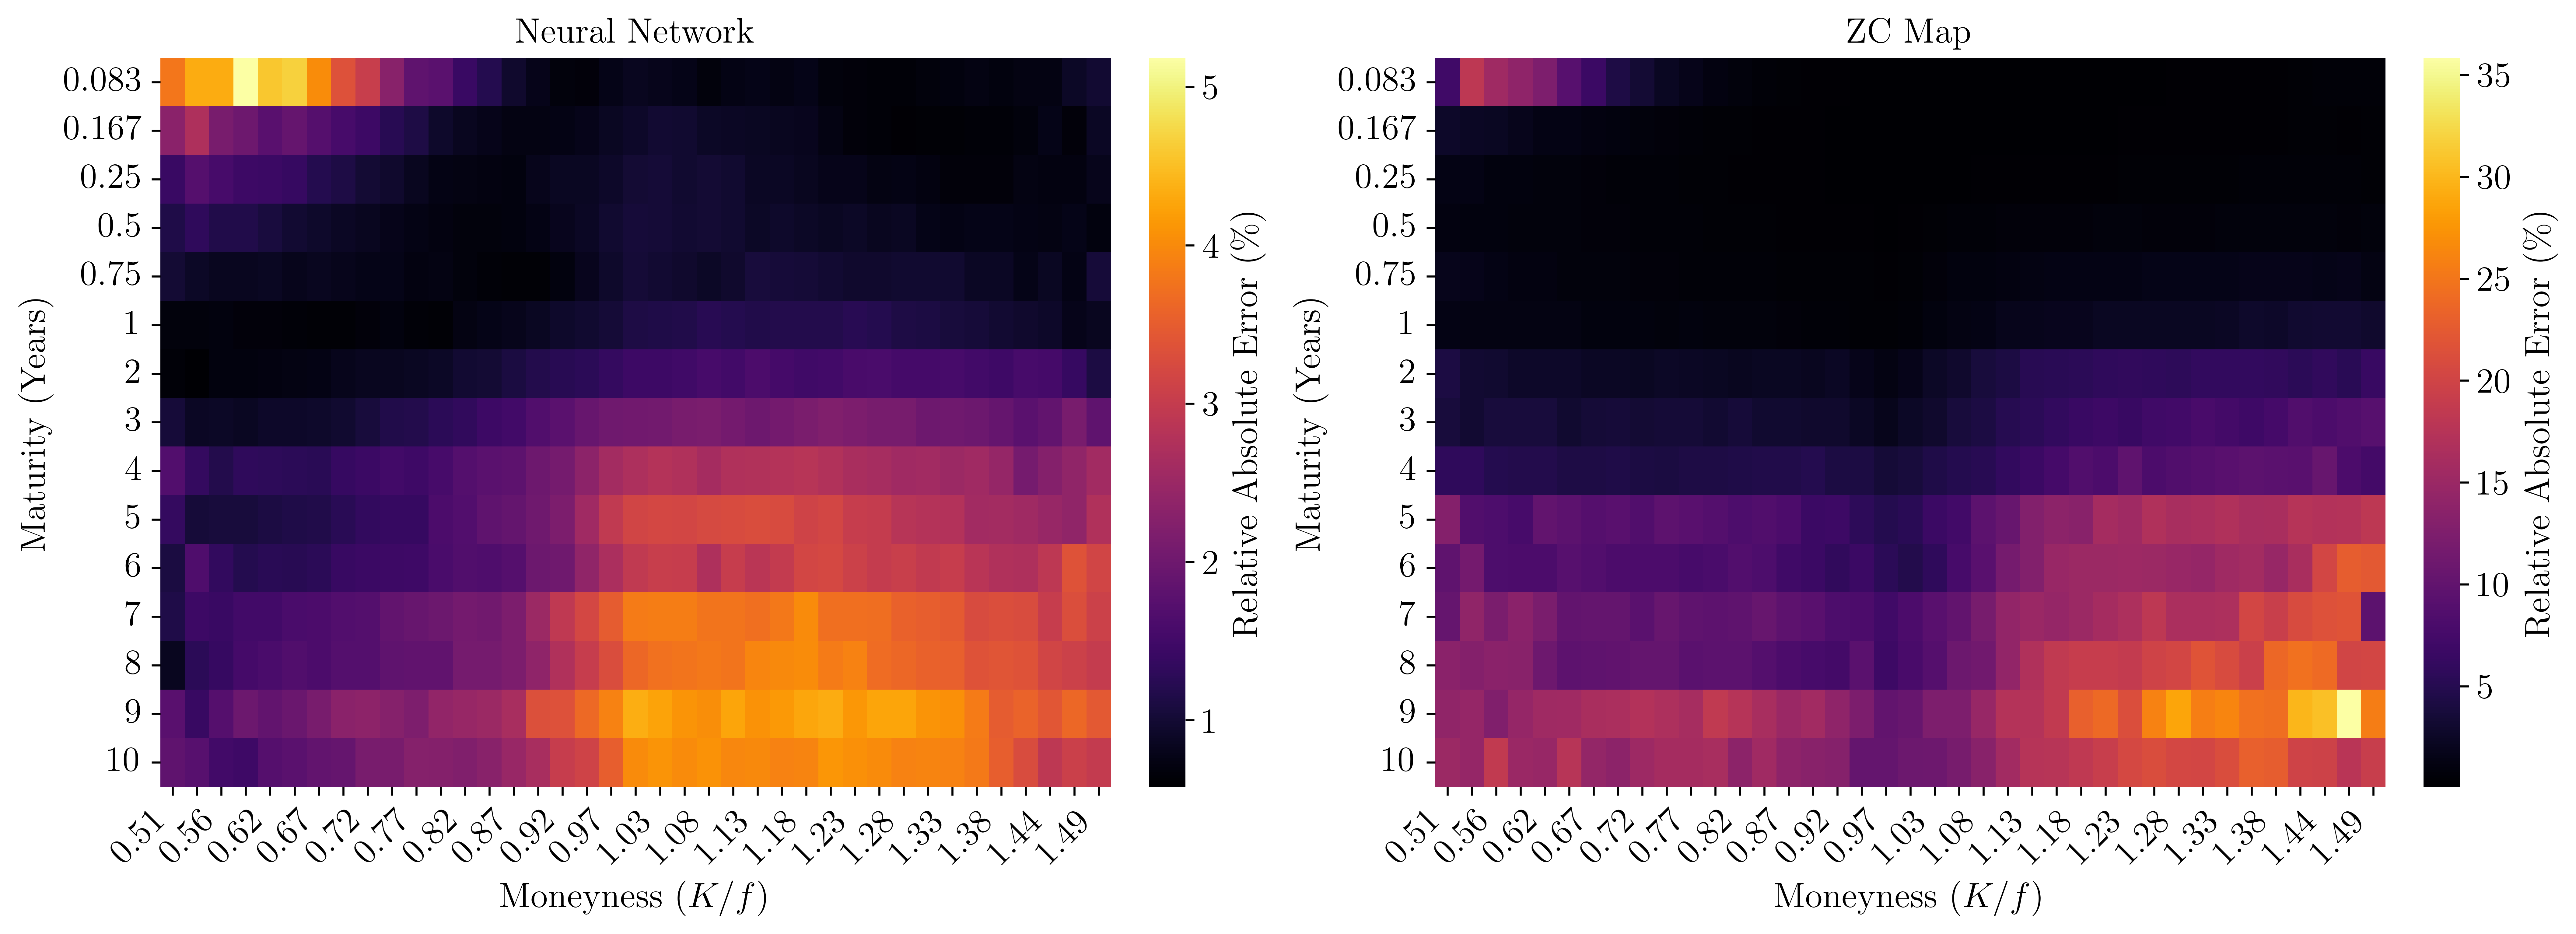

In [4]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Latin Modern Roman'],
    'font.size': 14,
    'font.weight': 'bold',
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'legend.title_fontsize': 14,
    'text.usetex': True,
})

unique_T = sorted(df['T'].unique())
strike_bins = np.linspace(df['moneyness'].min(), df['moneyness'].max(), 40)
df['strike_bin'] = pd.cut(df['moneyness'], bins=strike_bins)
df['T_bin'] = pd.Categorical(df['T'], categories=unique_T, ordered=True)

error_cols_1 = ['error_nn', 'error_antonov']
titles_1 = ['Neural Network', 'ZC Map']

custom_ticks_dict = {
    "Neural Network": [1, 2, 3, 4, 5],
    "ZC Map": [5, 10, 15, 20, 25, 30, 35]
}

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True, constrained_layout=True, dpi=600)

for ax, col, title in zip(axes, error_cols_1, titles_1):
    grouped = df.groupby(['T_bin', 'strike_bin'])[col].median().unstack()
    Z = grouped.values
    Z = np.where(Z <= 0, np.nan, Z)

    T_labels = [("{:.3f}".format(float(t))).rstrip('0').rstrip('.') for t in grouped.index]
    strike_labels = [round(interval.mid, 2) for interval in grouped.columns]
    strike_labels = [lbl if i % 2 == 0 else "" for i, lbl in enumerate(strike_labels)]

    vmin = np.nanmin(Z)
    vmax = np.nanmax(Z)

    heatmap = sns.heatmap(
        Z, ax=ax, cmap="inferno", cbar=True,
        xticklabels=strike_labels, yticklabels=T_labels,
        vmin=vmin, vmax=vmax,
        cbar_kws={"pad": 0.04}
    )

    ax.tick_params(labelleft=True)
    cbar = heatmap.collections[0].colorbar
    custom_ticks = custom_ticks_dict[title]
    cbar.set_ticks(custom_ticks)
    cbar.set_ticklabels([str(int(t)) for t in custom_ticks])
    cbar.set_label(r"Relative Absolute Error (\%)")
    ax.set_title(title)
    ax.set_xlabel("Moneyness ($K/f$)")
    ax.set_ylabel("Maturity (Years)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")

plt.show()

/var/folders/x2/wtthh7_97c7c3r0cyqd569zc0000gn/T/ipykernel_17174/1069000548.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['T_bin', 'strike_bin'])[col].median().unstack()
/var/folders/x2/wtthh7_97c7c3r0cyqd569zc0000gn/T/ipykernel_17174/1069000548.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['T_bin', 'strike_bin'])[col].median().unstack()


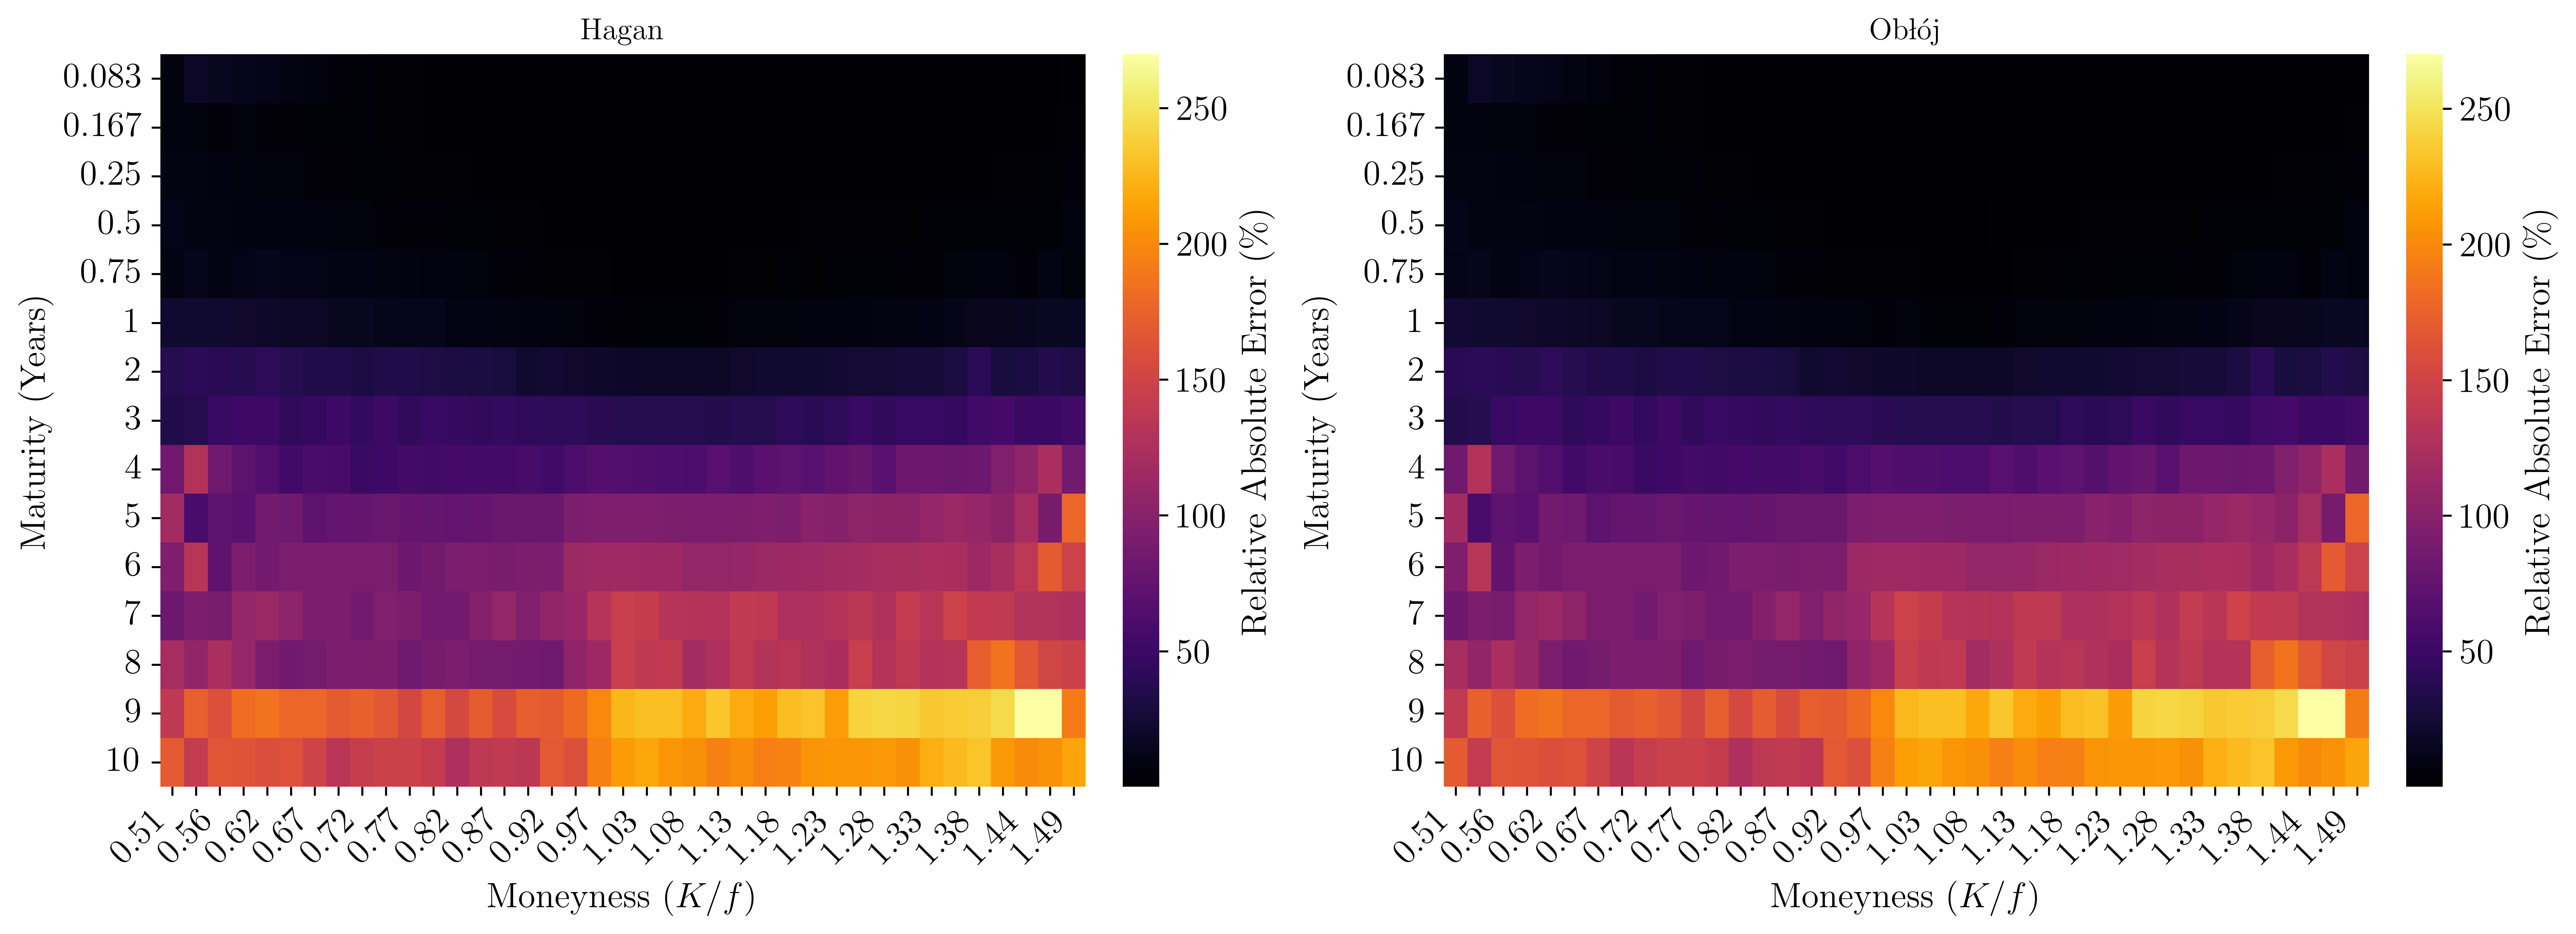

In [5]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Latin Modern Roman'],
    'font.size': 14,
    'font.weight': 'bold',
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'legend.title_fontsize': 14,
    'text.usetex': True,
})

unique_T = sorted(df['T'].unique())
strike_bins = np.linspace(df['moneyness'].min(), df['moneyness'].max(), 40)
df['strike_bin'] = pd.cut(df['moneyness'], bins=strike_bins)
df['T_bin'] = pd.Categorical(df['T'], categories=unique_T, ordered=True)

error_cols_1 = ['error_hagan', 'error_obloj']
titles_1 = ['Hagan', 'Obłój']

custom_ticks_dict = {
    "Hagan": [50, 100, 150, 200, 250],
    "Obłój": [50, 100, 150, 200, 250]
}

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True, constrained_layout=True, dpi=600)

for ax, col, title in zip(axes, error_cols_1, titles_1):
    grouped = df.groupby(['T_bin', 'strike_bin'])[col].median().unstack()
    Z = grouped.values
    Z = np.where(Z <= 0, np.nan, Z)

    T_labels = [("{:.3f}".format(float(t))).rstrip('0').rstrip('.') for t in grouped.index]
    strike_labels = [round(interval.mid, 2) for interval in grouped.columns]
    strike_labels = [lbl if i % 2 == 0 else "" for i, lbl in enumerate(strike_labels)]

    vmin = np.nanmin(Z)
    vmax = np.nanmax(Z)

    heatmap = sns.heatmap(
        Z, ax=ax, cmap="inferno", cbar=True,
        xticklabels=strike_labels, yticklabels=T_labels,
        vmin=vmin, vmax=vmax,
        cbar_kws={"pad": 0.04}
    )

    ax.tick_params(labelleft=True)
    cbar = heatmap.collections[0].colorbar
    custom_ticks = custom_ticks_dict[title]
    cbar.set_ticks(custom_ticks)
    cbar.set_ticklabels([str(int(t)) for t in custom_ticks])
    cbar.set_label(r"Relative Absolute Error (\%)")
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel("Moneyness ($K/f$)")
    ax.set_ylabel("Maturity (Years)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")

plt.show()

### Maximum Error

/var/folders/x2/wtthh7_97c7c3r0cyqd569zc0000gn/T/ipykernel_17174/3521249387.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['T_bin', 'strike_bin'])[col].max().unstack()
/var/folders/x2/wtthh7_97c7c3r0cyqd569zc0000gn/T/ipykernel_17174/3521249387.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['T_bin', 'strike_bin'])[col].max().unstack()
/var/folders/x2/wtthh7_97c7c3r0cyqd569zc0000gn/T/ipykernel_17174/3521249387.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to 

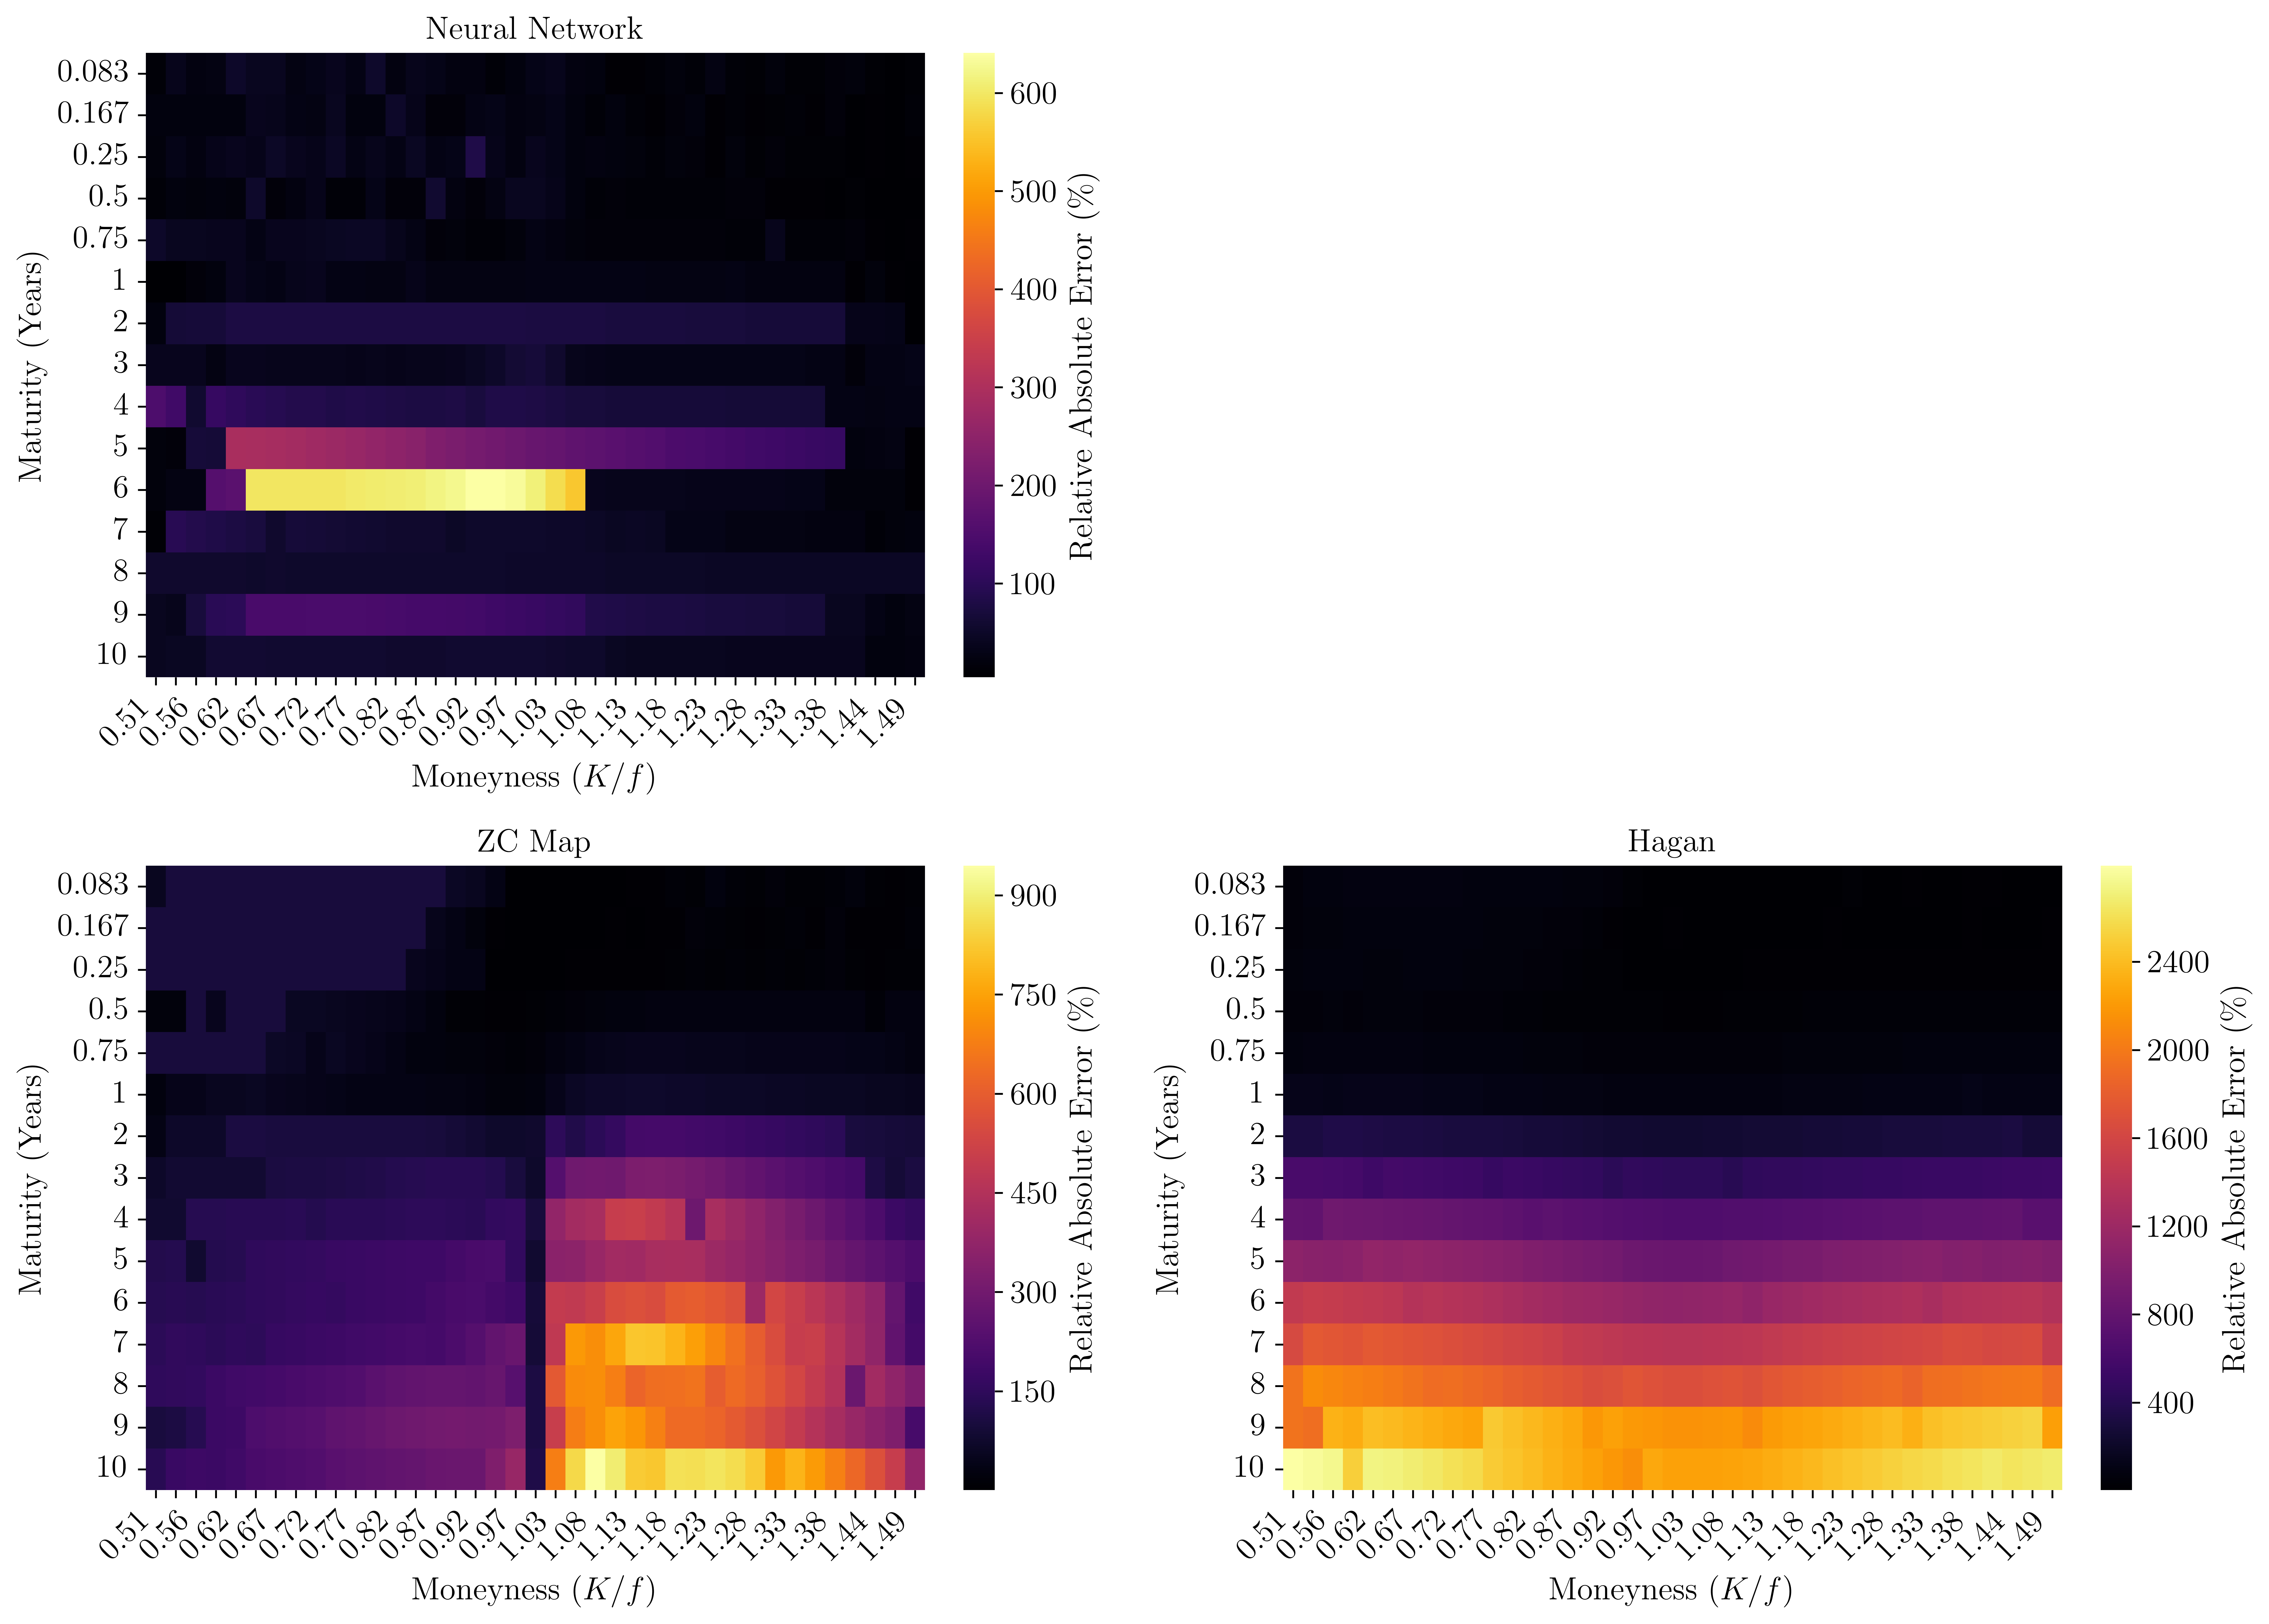

In [6]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Latin Modern Roman'],
    'font.size': 14,
    'font.weight': 'bold',
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'legend.title_fontsize': 14,
    'text.usetex': True,
})

unique_T = sorted(df['T'].unique())
strike_bins = np.linspace(df['moneyness'].min(), df['moneyness'].max(), 40)
df['strike_bin'] = pd.cut(df['moneyness'], bins=strike_bins)
df['T_bin'] = pd.Categorical(df['T'], categories=unique_T, ordered=True)

error_cols = ['error_nn', 'error_antonov', 'error_hagan']
titles = ['Neural Network', 'ZC Map', 'Hagan']

custom_ticks_dict = {
    "Neural Network": [100, 200, 300, 400, 500, 600],
    "ZC Map": [150, 300, 450, 600, 750, 900],
    "Hagan": [400, 800, 1200, 1600, 2000, 2400]
}

fig = plt.figure(figsize=(14, 10), dpi=600)
gs = GridSpec(2, 2, figure=fig, height_ratios=[1, 1], width_ratios=[1, 1])

axes = [
    fig.add_subplot(gs[0, 0]),
    fig.add_subplot(gs[1, 0]),
    fig.add_subplot(gs[1, 1])
]

fig.add_subplot(gs[0, 1]).axis("off")

for ax, col, title in zip(axes, error_cols, titles):
    grouped = df.groupby(['T_bin', 'strike_bin'])[col].max().unstack()
    Z = grouped.values
    Z = np.where(Z <= 0, np.nan, Z)

    T_labels = [("{:.3f}".format(float(t))).rstrip('0').rstrip('.') for t in grouped.index]
    strike_labels = [round(interval.mid, 2) for interval in grouped.columns]
    strike_labels = [lbl if i % 2 == 0 else "" for i, lbl in enumerate(strike_labels)]

    vmin = np.nanmin(Z)
    vmax = np.nanmax(Z)

    heatmap = sns.heatmap(
        Z, ax=ax, cmap="inferno", cbar=True,
        xticklabels=strike_labels, yticklabels=T_labels,
        vmin=vmin, vmax=vmax,
        cbar_kws={"pad": 0.04}
    )

    ax.tick_params(labelleft=True)
    cbar = heatmap.collections[0].colorbar
    custom_ticks = custom_ticks_dict[title]
    formatted_ticks = [f"{t:.2f}".rstrip('0').rstrip('.') for t in custom_ticks]
    cbar.set_ticks(custom_ticks)
    cbar.set_ticklabels(formatted_ticks)
    cbar.set_label(r"Relative Absolute Error (\%)")

    ax.set_title(title)
    ax.set_xlabel("Moneyness ($K/f$)")
    ax.set_ylabel("Maturity (Years)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")

plt.tight_layout()
plt.show()

### Nu vs Maturity Error

/var/folders/x2/wtthh7_97c7c3r0cyqd569zc0000gn/T/ipykernel_17174/2885241343.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['T_bin', 'strike_bin'])[col].median().unstack()
/var/folders/x2/wtthh7_97c7c3r0cyqd569zc0000gn/T/ipykernel_17174/2885241343.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['T_bin', 'strike_bin'])[col].median().unstack()
/var/folders/x2/wtthh7_97c7c3r0cyqd569zc0000gn/T/ipykernel_17174/2885241343.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fal

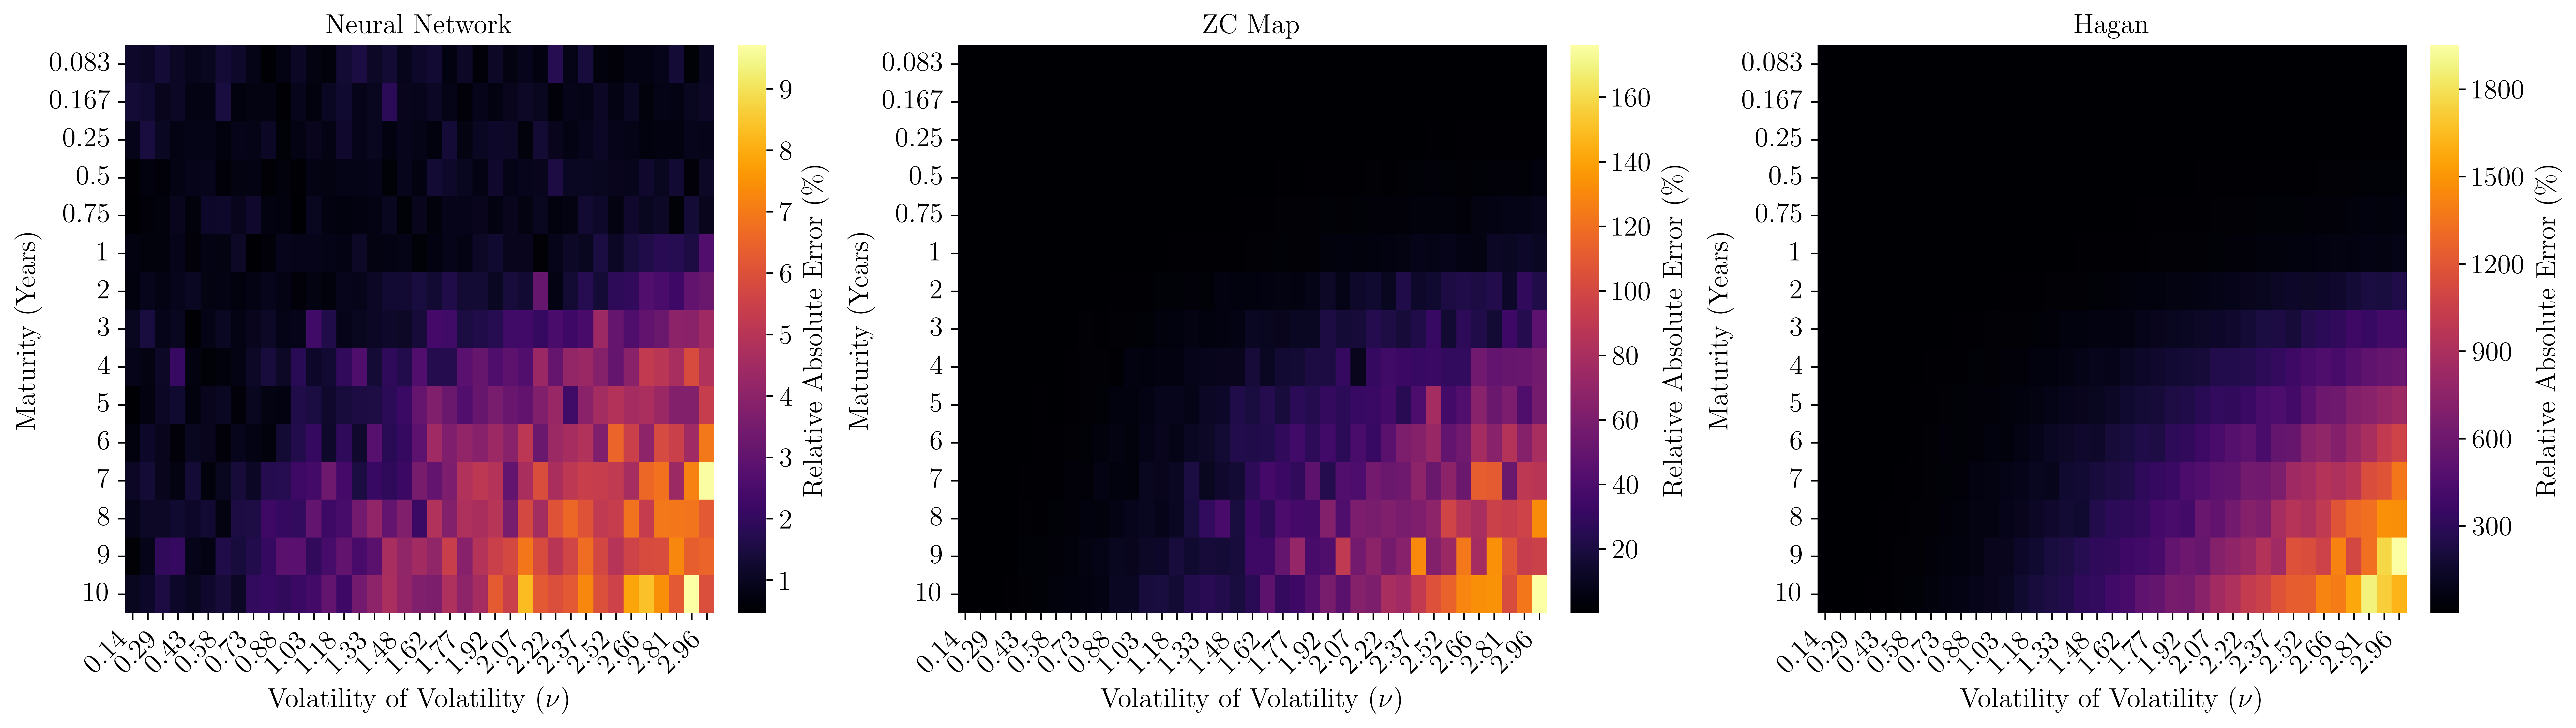

In [7]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Latin Modern Roman'],
    'font.size': 14,
    'font.weight': 'bold',
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'legend.title_fontsize': 14,
    'text.usetex': True,
})

unique_T = sorted(df['T'].unique())
strike_bins = np.linspace(df['nu'].min(), df['nu'].max(), 40)
df['strike_bin'] = pd.cut(df['nu'], bins=strike_bins)
df['T_bin'] = pd.Categorical(df['T'], categories=unique_T, ordered=True)

error_cols = ['error_nn', 'error_antonov', 'error_hagan']
titles = ['Neural Network', 'ZC Map', 'Hagan']

custom_ticks_dict = {
    "Neural Network": [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "ZC Map": [20, 40, 60, 80, 100, 120, 140, 160],
    "Hagan": [300, 600, 900, 1200, 1500, 1800]
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, constrained_layout=True, dpi=600)

for ax, col, title in zip(axes, error_cols, titles):
    grouped = df.groupby(['T_bin', 'strike_bin'])[col].median().unstack()
    Z = grouped.values
    Z = np.where(Z <= 0, np.nan, Z)

    T_labels = [("{:.3f}".format(float(t))).rstrip('0').rstrip('.') for t in grouped.index]
    strike_labels = [round(interval.mid, 2) for interval in grouped.columns]
    strike_labels = [lbl if i % 2 == 0 else "" for i, lbl in enumerate(strike_labels)]

    vmin, vmax = np.nanmin(Z), np.nanmax(Z)
    heatmap = sns.heatmap(
        Z, ax=ax, cmap="inferno", cbar=True,
        xticklabels=strike_labels, yticklabels=T_labels,
        vmin=vmin, vmax=vmax,
        cbar_kws={"pad": 0.04}
    )

    cbar = heatmap.collections[0].colorbar
    custom_ticks = custom_ticks_dict[title]
    cbar.set_ticks(custom_ticks)
    cbar.set_ticklabels([str(int(t)) for t in custom_ticks])
    cbar.set_label(r"Relative Absolute Error (\%)")

    ax.set_title(title)
    ax.set_xlabel(r"Volatility of Volatility ($\nu$)")
    ax.set_ylabel(r"Maturity (Years)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")

plt.show()

### Regression

In [ ]:
y = df['impl_volatility']
features = ['impl_volatility_og_nn', 'impl_volatility_og_hagan', 'impl_volatility_og_antonov']

results = {}


for feat in features:
    X = df[[feat]]
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    robust = model.get_robustcov_results(cov_type='HC1')  # MacKinnon and White (1985)

    results[feat] = robust



In [9]:
results["impl_volatility_og_antonov"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        impl_volatility   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                 8.289e+05
Date:                Fri, 14 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:21:31   Log-Likelihood:             3.9890e+05
No. Observations:              278287   AIC:                        -7.978e+05
Df Residuals:                  278285   BIC:                        -7.978e+05
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0071      0.000     26.479      0.000       0.007       0.008
impl_volatility_og_antonov     0.9239      0.001    910.448      0.000       0.922       0.926
==============================================================================
Omnibus:                    85928.876   Durbin-Watson:                   0.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2506552.141
Skew:                          -0.883   Prob(JB):                         0.00
Kurtosis:                      17.596   Cond. No.                         8.54
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [10]:
results["impl_volatility_og_hagan"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        impl_volatility   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2449.
Date:                Fri, 14 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:21:31   Log-Likelihood:             1.7471e+05
No. Observations:              278287   AIC:                        -3.494e+05
Df Residuals:                  278285   BIC:                        -3.494e+05
Df Model:                           1                                         
Covariance Type:                  HC1                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2428      0.000    728.175      0.000       0.242       0.243
impl_volatility_og_hagan     0.0270      0.001     49.483      0.000       0.026       0.028
==============================================================================
Omnibus:                    25179.098   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33199.803
Skew:                           0.779   Prob(JB):                         0.00
Kurtosis:                       3.663   Cond. No.                         2.83
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [11]:
results["impl_volatility_og_nn"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        impl_volatility   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.164e+06
Date:                Fri, 14 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:21:31   Log-Likelihood:             6.9652e+05
No. Observations:              278287   AIC:                        -1.393e+06
Df Residuals:                  278285   BIC:                        -1.393e+06
Df Model:                           1                                         
Covariance Type:                  HC1                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0049      0.000    -22.093      0.000      -0.005      -0.004
impl_volatility_og_nn     1.0122      0.001   1078.992      0.000       1.010       1.014
==============================================================================
Omnibus:                   175218.259   Durbin-Watson:                   0.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       8976449610.814
Skew:                           0.937   Prob(JB):                         0.00
Kurtosis:                     882.854   Cond. No.                         8.43
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""